In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [2]:
# Import data

# Option 1: Mounting Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

# # Load from saved location
# import pandas as pd
# X_train = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2022_Train_Test/X_train.xlsx')
# X_test = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2022_Train_Test/X_test.xlsx')
# y_train = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2022_Train_Test/y_train.xlsx')['Energy']
# y_test = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2022_Train_Test/y_test.xlsx')['Energy']


# Option 2: Downloaded Files
X_train = pd.read_excel('X_train.xlsx')
X_test = pd.read_excel('X_test.xlsx')
y_train = pd.read_excel('y_train.xlsx')
y_test = pd.read_excel('y_test.xlsx')

In [3]:
# Shape
print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)
print('y_train Shape:', y_train.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (21024, 5)
X_test Shape: (5256, 5)
y_train Shape: (21024, 1)
y_test Shape: (5256, 1)


# Create and Test Model

In [4]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [5]:
import tensorflow as tf
import random
import os

# Used to have the same randomness/shuffle each time
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)
os.environ['PYTHONHASHSEED'] = '42'

In [6]:
# Create ANN model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2)) # dropout layer for regularization (makes model more robust)
#model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.2)) # dropout layer for regularization
model.add(Dense(1, activation='linear')) # output layer with linear activation

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [8]:
from sklearn.model_selection import train_test_split
# Split for validation set again
X_train_final, X_val, y_train_final, y_val = train_test_split(
                                                      X_train, y_train, test_size=0.1, random_state=42)

In [9]:
# Reshape for ANN
X_train_final_reshaped = X_train_final.values.reshape(X_train_final.shape[0], 1, X_train_final.shape[1])
X_val_reshaped = X_val.values.reshape(X_val.shape[0], 1, X_val.shape[1])

In [10]:
# Train model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 352.4705 - mae: 9.1884 - val_loss: 3.5210 - val_mae: 0.8169
Epoch 2/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 38.3651 - mae: 2.8491 - val_loss: 2.1821 - val_mae: 0.8737
Epoch 3/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 21.7507 - mae: 2.1631 - val_loss: 1.6329 - val_mae: 0.5776
Epoch 4/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 18.7119 - mae: 1.9268 - val_loss: 4.7758 - val_mae: 1.3822
Epoch 5/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 15.2177 - mae: 1.7556 - val_loss: 2.4131 - val_mae: 0.7759
Epoch 6/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 14.8749 - mae: 1.5948 - val_loss: 5.6918 - val_mae: 1.1053
Epoch 7/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 14.3107 - mae: 1.5913 - val_loss: 1.4163 - val_mae: 0.4911
Epoch 8/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 14.0241 - mae: 1.5471 - val_loss: 6.4844 - val_mae: 1.2810
Epoch 9/100
657/657 ━━━━━━━━━━━━━━━━━━━

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict with model
y_pred = model.predict(X_test)

# Test accuracy
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE:', mse)
print('R2:', r2)

# Tuning
# Epochs =200, 3 hidden layers
#MSE: 14.289684901288187, R2: 0.9910152026492353
# Epochs =200, 3 hidden layers
#MSE: 0.40408727988688464, R2: 0.999745925655682

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
MSE: 1.5964767932891846
R2: 0.9989961981773376


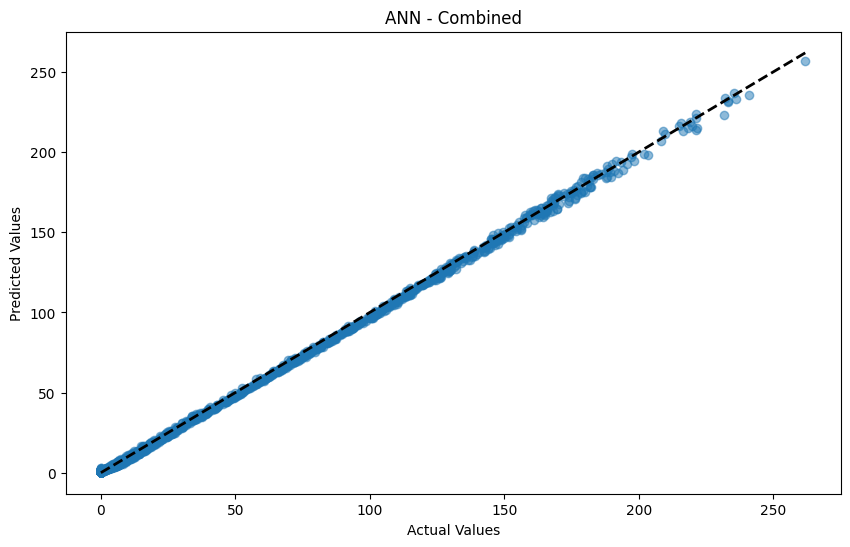

In [12]:
# Visualize random forest model's results
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.title('ANN - Combined')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Predict with 2023 Data

In [13]:
# Import 2023 data
# from google.colab import drive
# drive.mount('/content/drive')

# # Option 1: Mount Drive
# # South
# import pandas as pd
# X_train_23 = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2023 Data/X_train_23.xlsx')
# X_test_23 = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2023 Data/X_test_23.xlsx')
# y_train_23 = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2023 Data/y_train_23.xlsx')
# y_test_23 = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2023 Data/y_test_23.xlsx')

# # Extract target variable as 1D arrays
# y_train_23 = y_train_23['Energy'].values  # fixing added column issue
# y_test_23 = y_test_23['Energy'].values

# Option 2: Downloaded Files
X_train_23 = pd.read_excel('X_train_23.xlsx')
X_test_23 = pd.read_excel('X_test_23.xlsx')
y_train_23 = pd.read_excel('y_train_23.xlsx')['Energy']
y_test_23 = pd.read_excel('y_test_23.xlsx')['Energy']

In [14]:
# Reshape data
X_test_23_reshape = X_test_23.values

In [15]:
# Predict data
y_pred_23 = model.predict(X_test_23_reshape)  # Use X_test_23 for prediction
mse_test_23 = mean_squared_error(y_test_23, y_pred_23)  # Use y_test_23 for evaluation
r2_test_23 = r2_score(y_test_23, y_pred_23)
print('Test MSE 2023:', mse_test_23)
print('Test R^2 2023:', r2_test_23)

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Test MSE 2023: 17.174515955341548
Test R^2 2023: 0.989057759192181


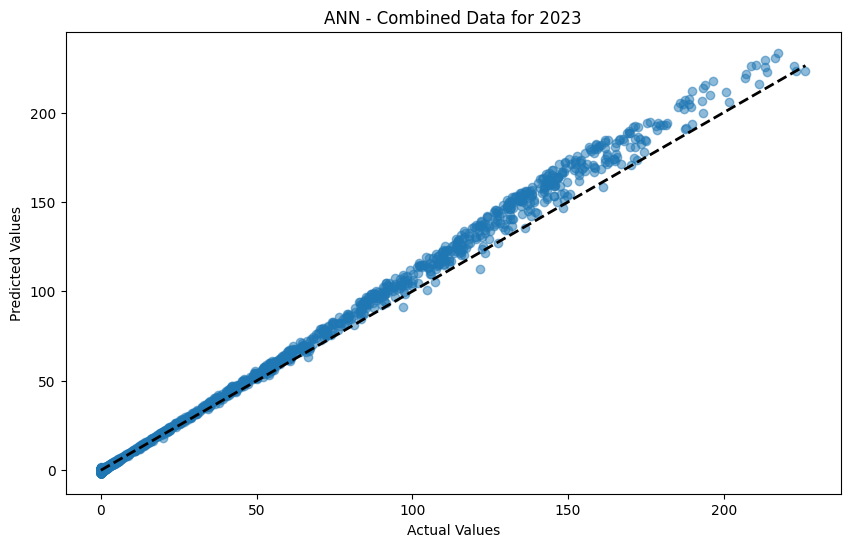

In [16]:
# Visualize model's results
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_23, y_pred_23, alpha=0.5)
plt.plot([y_test_23.min(), y_test_23.max()], [y_test_23.min(), y_test_23.max()], 'k--', lw=2)  # Diagonal line
plt.title('ANN - Combined Data for 2023')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

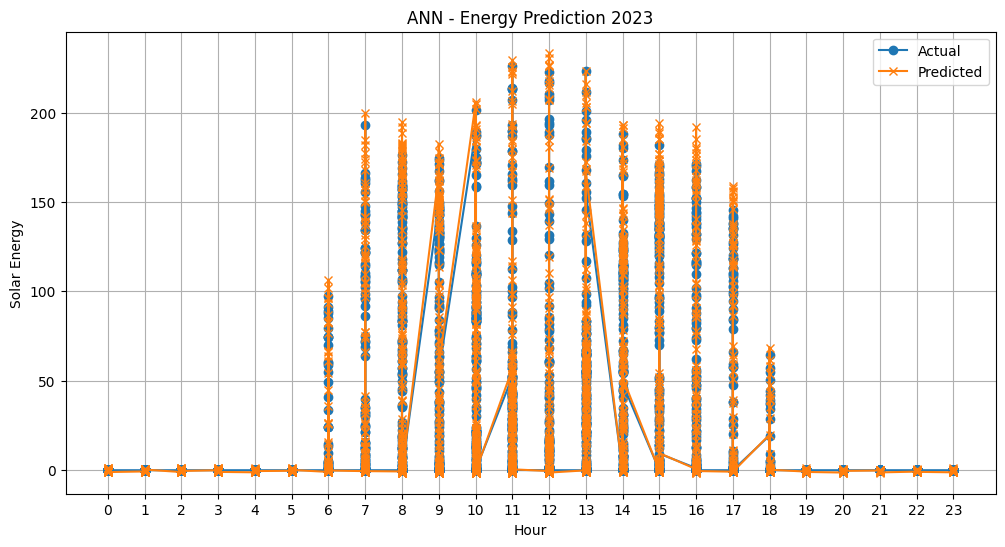

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Flatten y_pred values to 1D
y_pred_23 = y_pred_23.flatten()
# 1. Create a DataFrame to hold the data
results_df = pd.DataFrame({'Hour': X_test_23['Hour'], 'Actual': y_test_23, 'Predicted': y_pred_23})

# 2. Sort by hour
results_df = results_df.sort_values(by=['Hour']) # This will sort the dataframe based on hour which will help in plotting

# 3. Plot the actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(results_df['Hour'], results_df['Actual'], label='Actual', marker='o')
plt.plot(results_df['Hour'], results_df['Predicted'], label='Predicted', marker='x')
plt.xlabel('Hour')
plt.ylabel('Solar Energy')
plt.title('ANN - Energy Prediction 2023')
plt.legend()
plt.grid(True)
plt.xticks(range(24))  # Set x-axis ticks to represent hours 0-23
plt.show()